In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Task 1

In [2]:
def seq_array(shape, s=1.0):
    """ Generate a general sequential array.

    Parameters
    ----------
    shape: tuple
        array shape
    s: Union[int, float]
        an optional starting number s
        (default = 1)
        
    Returns
    -------
    numpy.ndarray[Union[int, float]]
        a  general sequential array with the
        shape provided and starting value s.
    """
    length = np.prod(shape)
    
    seq = np.arange(s, s+length)
    
    return seq.reshape(shape)

In [3]:
seq_array((4,))

array([1., 2., 3., 4.])

In [4]:
seq_array((3, 2), 5)

array([[ 5,  6],
       [ 7,  8],
       [ 9, 10]])

# Task 2

In [5]:
def determine_hub_speed_np(v_meas, h_meas, h_hub, alpha):
    """ Determine the wind speed for differences between velocity measurement height and hub height.

    Parameters
    ----------
    v_meas: numpy.ndarray[float]
        Wind speed measured at a height of h_meas
    h_meas: float
        Height of at which the wind speed is measured
    h_hub: float
        Height of the hub
    alpha: float
        Correlation coefficient

    Returns
    -------
    v_hub: numpy.ndarray[float]
        The wind speed at the hub
    """
    return v_meas * (h_hub / h_meas) ** alpha

In [6]:
v_meas = np.array([0.,2.,4.])
h_meas = 10.
h_hub = 80.
alpha = 0.15
determine_hub_speed_np(v_meas, h_meas, h_hub, alpha)

array([0.        , 2.73208051, 5.46416103])

# Task 3
This function first calculates the wind speed using the Pythagorean theorem. 
Then it calculates the wind direction using the arctan2 function from the numpy library,
which returns the angle in radians between the positive x-axis and 
the point given by the coordinates (u, v) on a plane. 
The result is then converted to degrees and adjusted to ensure 
it falls within the range of 0 to 360 degrees. 
The function finally returns a tuple containing 
the calculated wind speed and direction. 
Please note that this function assumes that a wind direction of 0 degrees c
orresponds to a wind coming from the north, and that angles increase 
in a clockwise direction.

In [7]:
def uv_to_speed_direction(u, v):
    """ Convert wind speeds from u and v components into speed and direction.

    Parameters:
        u (float): east-west component (towards east positive) m/s.
        v (float): north-south component (towards north positive) m/s.

    Returns:
    tuple[float, float]
        speed_and_direction : A tuple containing wind speed (m/s) and wind
        , direction (in degrees, wind from the north = 0 or 360 degrees).
    """
    speed = np.sqrt(u**2 + v**2)
    direction = (np.arctan2(u, v) * 180/np.pi + 180) % 360
    return speed, direction

In [8]:
uv_to_speed_direction(1., 0.)
uv_to_speed_direction(-1., -1.)

(1.4142135623730951, 45.0)

# Task 4

In [9]:
# Step 1
def generate_windfarm_power_curve(power_curve_filename, turbine_number):
    """ Outputs a ‘Wind farm power curve’ of total wind farm power in MW
versus wind speed.

    Parameters
    ----------
    power_curve_filename: str
        CSV file
    turbine_number: int
        number of wind
turbines
    Returns
    -------
    numpy.ndarray[float]
        a numpy array with two columns and type float
        first column: wind speed
        second column: wind farm power at that speed
    """
    numpy_arr = np.genfromtxt(power_curve_filename, delimiter=",", skip_header=1)
    numpy_arr[:,1] = numpy_arr[:,1] * 0.001 * turbine_number
    return numpy_arr

In [10]:
output = generate_windfarm_power_curve('power_curve.csv', 67)

In [11]:
output.shape

(26, 2)

In [12]:
output[-2:-1]

array([[ 24. , 140.7]])

In [13]:
# Step 2
def read_csv_file(csv_file):
    """ Read csv file to numpy array.

    Parameters
    ----------
    csv_file: str
        CSV file
        
    Returns
    -------
    numpy.ndarray[str]
        numpy array
    """
    import csv
    with open(csv_file) as csv_f:
        next(csv_f)
        reader = csv.reader(csv_f)
        return np.array(list(reader))


def generate_time_wind_power(wind_filename, power_filename):
    """ Generate the time, wind speed and wind farm power for the
    Capital wind farm in January 2018.

    Parameters
    ----------
    wind_filename: str
        CSV file
        
    power_filename: str
        CSV file
        
    Returns
    -------
    tuple[datetime.datetime, numpy.ndarray[float], numpy.ndarray[float]]
        time, wind speed and wind farm power for the
        Capital wind farm in January 2018
    """
    from datetime import datetime
    cap_wind_arr = read_csv_file(wind_filename)
    cap_gen_arr  = read_csv_file(power_filename)
    
    date_format = "%d/%m/%Y %H:%M"
    u_10s = cap_wind_arr[:,1].astype(float)
    v_10s = cap_wind_arr[:,2].astype(float)
    
    dates = np.vectorize(lambda x: datetime.strptime(x, date_format))(cap_wind_arr[:,0])
    wind_speeds = np.sqrt(u_10s**2 + v_10s**2)
    
    alpha = 0.143
    hub_height = 80
    # IMPORTANT
    wind_speeds *= (hub_height / 10) ** alpha
    
    powers = cap_gen_arr[:,1].astype(float)
    return dates, wind_speeds, powers
    

In [14]:
t_ar ,w_ar ,p_ar = generate_time_wind_power('capital_wind.csv', 'capital_gen.csv')


In [15]:
t_ar.shape

(744,)

In [16]:
t_ar[0]

datetime.datetime(2018, 1, 1, 0, 30)

In [17]:
np.max(w_ar)

14.384398798026313

In [18]:
np.max(p_ar)

132.201664

In [19]:
# Step 3
def wind_farm_figure(windfarm_curve, times, wind, power):
    """ Generates a single matplotlib figure.

    Parameters
    ----------
    windfarm_curve: numpy.ndarray[float]
        a numpy array with two columns and type float
        first column: wind speed
        second column: wind farm power at that speed
        
    times: numpy.ndarray[datetime.datetime]
        an array of times with datetime type with time in UTC.
        
    power: numpy.ndarray[float]
        wind speed
    
    wind: numpy.ndarray[float]
        wind farm power
        
    Returns
    -------
    """
    from datetime import datetime
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    
    axs[0].scatter(wind, power, color='blue', label='Windfarm Generation')
    axs[0].plot(windfarm_curve[:, 0], windfarm_curve[:, 1], color='red', label='Power Curve')
    
    axs[0].set_xlabel("Wind Speed (m/s)")
    axs[0].set_ylabel("Power (MW)")
    axs[0].legend()
    axs[0].grid(True)
    
    start_date = datetime.strptime("07/01/2018", "%d/%m/%Y")
    end_date = datetime.strptime("14/01/2018", "%d/%m/%Y")
    
    mask = (start_date <= times) & (times <= end_date)
    
    times_filtered = times[mask]
    power_filtered = power[mask]
    wind_filtered = wind[mask]
    
    axs[1].plot(times_filtered, power_filtered, color='green')
    axs[1].set_xlabel("Time")
    axs[1].set_ylabel("Power (MW)")
    axs[1].grid(True)
    
    axs[2].plot(times_filtered, wind_filtered, color='purple')
    axs[2].set_xlabel("Time")
    axs[2].set_ylabel("Wind Speed (m/s)")
    axs[2].grid(True)
    
    plt.tight_layout()
    plt.show()

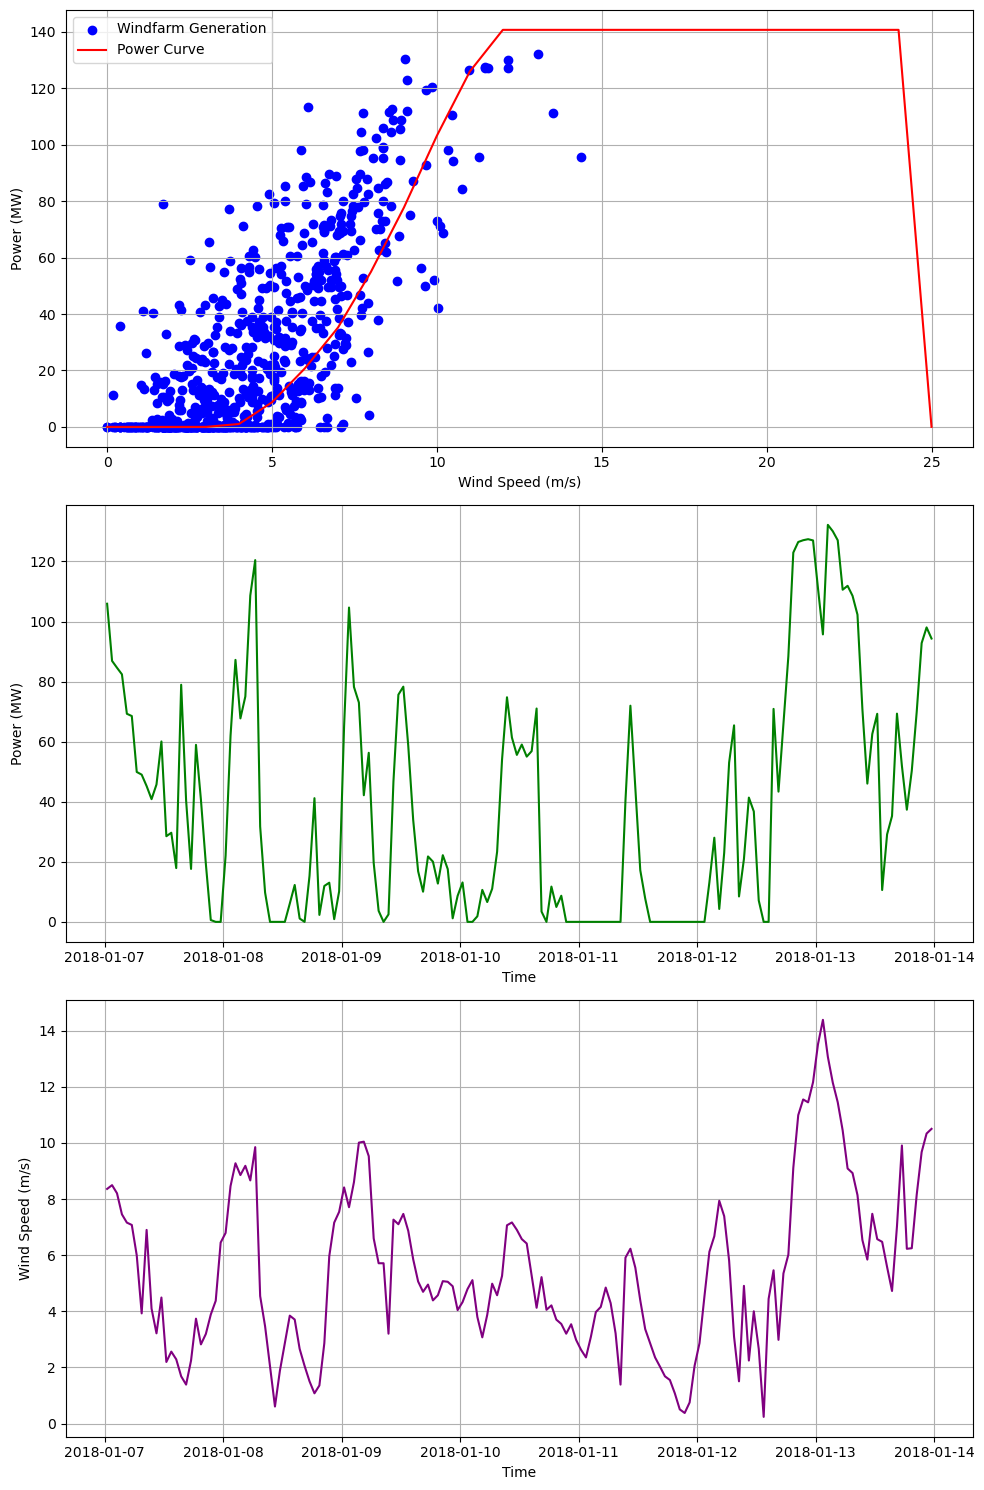

In [20]:
capital_pc = generate_windfarm_power_curve('power_curve.csv', 67)
(t_ar , w_ar , p_ar) = generate_time_wind_power('capital_wind.csv', 'capital_gen.csv')
wind_farm_figure(capital_pc , t_ar , w_ar , p_ar)

# Task 5

In [21]:
class Site:
    def __init__(self, alpha, rho, h_meas):
        """ Init Site's properties
        
        Parameters
        ----------
        alpha: float
            Correlation coefficient
        h_meas: float
            Height at which the wind speed is measured
        rho: float
            The air density

        Returns
        -------
        """
        self.alpha = alpha
        self.rho = rho
        self.h_meas = h_meas
        self.v_meas = 0
        
    def get_alpha(self):
        """ Returns the correlation coefficient

        Returns
         -------
        float
            Correlation coefficient
        """
        return self.alpha
    
    def get_rho(self):
        """ Returns the air density

        Returns
        -------
        float
            The air density
        """
        return self.rho
    
    def get_height(self):
        """ Returns the height of the measurement.

        Returns
        -------
        float
            The height at which the wind speed is measured
        """
        return self.h_meas
    
    def get_meas_speed(self):
        """ Returns the wind speed measurement.

        Returns
        -------
        float
            The wind speed measurement
        """
        return self.v_meas
    
    def set_meas_speed(self, u, v):
        """ Calculates and sets the measured speed.

        Parameters
         ----------
        u: float
            The wind speed measurement in the u direction (east-west)
        v: float
            The wind speed measurement in the v direction (north-south)

        Returns
        -------
        """
        self.v_meas = np.sqrt(u**2 + v**2)

In [22]:
site = Site(0.14, 1.225, 10)

In [23]:
site.get_alpha()

0.14

In [24]:
site.get_rho()

1.225

In [25]:
site.get_height()

10

In [26]:
site.get_meas_speed()

0

# Task 6

In [27]:
site = Site(0.14, 1.225, 10)

In [28]:
site.set_meas_speed(0, 1)

In [29]:
site.get_meas_speed()

1.0

In [30]:
site.set_meas_speed(3, 4)

In [31]:
site.get_meas_speed()

5.0

# Task 7

In [32]:
class Turbine:
    def __init__(self, h_hub, r, omega, curve_coeffs, speeds):
        """ Init Turbine's properties
        
        Parameters
        ----------
        h_hub: float
            Height of the hub
        r: float
            The radius of the turbine blades
        omega: float
            omega
        curve_coeffs: tuple
            tuple of coefficients (a, a, ..., ak)
        speeds: tuple
            tuple of threshold speeds (cut-in, cut-out and rated speeds)

        Returns
        -------
        """
        self.h_hub = h_hub
        self.r = r
        self.omega = omega
        self.curve_coeffs = curve_coeffs
        self.speeds = speeds
        self.v_hub = 0

    def get_hub_speed(self):
        """ Returns the hub speed

        Returns
        -------
        float
            The hub speed measurement.
        """
        return self.v_hub

    def determine_hub_speed(self, site):
        """ Determine the wind speed at the hub.
        Parameters
        ----------
        site: Site object
            An instance of the Site class

        Returns
        -------
        """
        self.v_hub = site.get_meas_speed() * (self.h_hub / site.get_height()) ** site.get_alpha()
        

    def cap_hub_speed(self):
        """ Caps the hub speed at rated speed

        Parameters
        ----------

        Returns
        -------
        """
        rated_speed = self.speeds[-1]
        
        if self.v_hub > rated_speed:
            self.v_hub = rated_speed

    def determine_windpower(self, site):
        """ Returns the wind power.

        Parameters
        ----------
        site: Site object
            An instance of the Site class

        Returns
        -------
        float:
            The wind power
        """
        A = np.pi * self.r ** 2
        return (0.5 * site.get_rho() * A * self.v_hub ** 3) / 10**3
        

    def determine_mech_coef(self):
        """ Returns the mech coefficient.

        Parameters
        ----------

        Returns
        -------
        float:
            The mech coefficient
        """
        lambda_ = self.r * self.omega / self.get_hub_speed()
        Cp = sum(a * lambda_**i for i, a in enumerate(self.curve_coeffs, start=1))
        return Cp

    def determine_mech_power(self, site):
        """ Returns the mech power.

        Parameters
        ----------
        site: Site object
            An instance of the Site class

        Returns
        -------
        float:
            The mech power
        """
        vcutin, vcutout, vrated = self.speeds
        
        p_mech = 0
        vhub = self.get_hub_speed()
        
        cp = self.determine_mech_coef()
        p_wind = self.determine_windpower(site)
        
        if vcutin < vhub <= vrated:
            p_mech = cp * p_wind
        elif  vrated < vhub <= vcutout:
            p_mech = self.determine_mech_power(site)

        return p_mech

In [33]:
CURVE_COEFFS = (-2.579E-03, 2.311E-02, -2.155E-03, 3.703E-05, -1.367E-06)
SPEEDS = (2, 15, 12)
site = Site(0.14, 1.225, 10)
turbine = Turbine(60, 40, 2.11, CURVE_COEFFS, SPEEDS)
site.set_meas_speed(4, 6)
turbine.determine_hub_speed(site)

turbine.get_hub_speed()

9.267078606531117

In [34]:
turbine.determine_windpower(site)

2450.2166629351327

In [35]:
 turbine.determine_mech_coef()

0.4345560922031839

In [36]:
turbine.determine_mech_power(site)

1064.7565780962173

# Task 8

In [37]:
def determine_total_energy(turbine, site, filename):
    """ Calculates the total energy with a given
    turbine and site over the observation time interval.

    Parameters
    ----------
    turbine: Turbine
        turbine object
    site: Site
        site object
    filename: str
        CSV file

    Returns
    -------
    float
        total energy
    """
    import warnings
    warnings.filterwarnings("ignore")
    data = np.genfromtxt(filename, delimiter=',', skip_header=1)
    
    total_energy = 0
    
    for row in data:
        site.set_meas_speed(row[1], row[2])
        
        turbine.determine_hub_speed(site)
        
        turbine.cap_hub_speed()
        p_mech = turbine.determine_mech_power(site)
        
        total_energy += p_mech * 0.9
        
    return total_energy

In [38]:
CURVE_COEFFS = (-2.579E-03, +2.311E-02, -2.155E-03, +3.703E-05, -1.367E-06)
SPEEDS = (7.5, 17, 12)
turbine = Turbine(60, 40, 2.11, CURVE_COEFFS, SPEEDS)
site = Site(0.14, 1.225, 10)
filename = "capital_wind.csv"
total_energy = determine_total_energy(turbine, site, filename)
print(total_energy)

51461.61794429864


# Task 9

In [39]:
def print_table(turbine_parameters, site_parameters, separator, filename):
    """ Creating a table which prints out the total energy generated for the given site
    scenario and the various potential turbine options.

    Parameters
    ----------
    turbine_parameters: tuple[tuple[Turbine]]
        a tuple of tuples of Turbine objects
    param_: tuple[str]
        a tuple of strings of Site properties
    separator: str
        format separator in table
    filename: str
        CSV file

    Returns
    -------
    """
    print(separator * 53)
    print(f"*{'Case number':^25}*{'Total energy (kW)':^25}*")
    print(separator * 53)

    for i, params in enumerate(turbine_parameters, start=1):
        h_hub, r, omega, curve_coeffs, speeds = params
        turbine = Turbine(h_hub, r, omega, curve_coeffs, speeds)
        
        site = Site(*site_parameters)

        total_energy = determine_total_energy(turbine, site, filename)
        print(f"* {i:^24}*{total_energy:^25.2f}*")

    print(separator * 53)

In [40]:
turbine_parameters = (
    (60, 40, 2.11, (-2.579E-03, +2.311E-02, -2.155E-03, +3.703E-05, -1.367E-06), (7.5, 17, 12)),
    (55, 35, 2.11, (-6.798E-03, +3.552E-02, -4.583E-03, +1.395E-04), (7.5, 16, 10.5)),
    (50, 40, 2.11, (+1.338E-03, +1.604E-02, 0.0E-00, 0.0E-00, -6.220E-06), (6.5, 16, 10.5))
)
site_parameters = (0.14, 1.225, 10)
filename = "capital_wind.csv"
print_table(turbine_parameters, site_parameters, '*', filename)

*****************************************************
*       Case number       *    Total energy (kW)    *
*****************************************************
*            1            *        51461.62         *
*            2            *        36913.49         *
*            3            *        136881.33        *
*****************************************************
